### Dependences

1. numpy and pandas: Will help us treat and explore the data, and execute vector and matrix operations.<br>
2. matplotlib and seaborn: Will help us plot the information so we can visualize it in different ways and  have a better understanding of it.<br>
3. keras: Will provide us all the necessary deep learning tools to develop a solution for the problem.<br>
4. scikit-learn: We are using this library since it gives us access to some tools to divide our dataset into training and test and some metrics we can use to evaluate our models.<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
from prettytable import PrettyTable
from keras.models import Sequential
#from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout


libgomp: Invalid value for environment variable OMP_PLACES


Importing the data and taking a quick look at it

In [5]:
df = pd.read_csv("/home/satyarth/Downloads/htru2/HTRU_2.csv")
df.head()



,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


From the readme, the columns specify

1. Mean of the integrated profile.<br>
2. Standard deviation of the integrated profile.<br>
3. Excess kurtosis of the integrated profile.<br>
4. Skewness of the integrated profile.<br>
5. Mean of the DM-SNR curve.<br>
6. Standard deviation of the DM-SNR curve.<br>
7. Excess kurtosis of the DM-SNR curve.<br>
8. Skewness of the DM-SNR curve.<br>

### Changing the name of some columns



In [6]:
df.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']
df.isna().sum()


mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

### Looking for object datatypes

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      17897 non-null  float64
 1   std_profile       17897 non-null  float64
 2   kurtosis_profile  17897 non-null  float64
 3   skewness_profile  17897 non-null  float64
 4   mean_dmsnr        17897 non-null  float64
 5   std_dmsnr         17897 non-null  float64
 6   kurtosis_dmsnr    17897 non-null  float64
 7   skewness_dmsnr    17897 non-null  float64
 8   target            17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


#### Show statistical information of our data

In [12]:
df.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


## Data Visualization

Plotting some things that might be of our interest from this dataset

In [13]:
#counting pulsars and not pulsars
pulsar = df[df['target'] ==1]
pulsar_count = pulsar["target"].value_counts()[1]
not_pulsar = df[df['target'] == 0]
not_pulsar_count = not_pulsar["target"].value_counts()[0]


Pie plotting the stats between pulsars and not pulsars

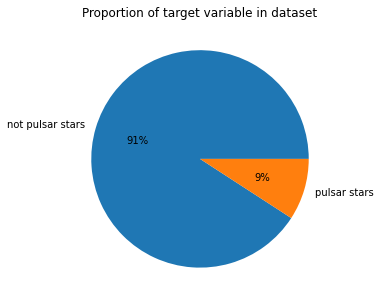

There are 1639 signals that belong to pulsar stars and 16259 signals that aren't from pulsars.


In [ ]:

plt.figure(figsize=(5,5))
plt.pie(df["target"].value_counts().values,labels=["not pulsar stars","pulsar stars"], autopct="%1.0f%%")
plt.title("Proportion of target variable in dataset")
plt.show()
print("There are " + str(pulsar_count) + " signals that belong to pulsar stars " 
      + "and " + str(not_pulsar_count) + " signals that aren't from pulsars.")

Plot correlation matrix

<Axes: >

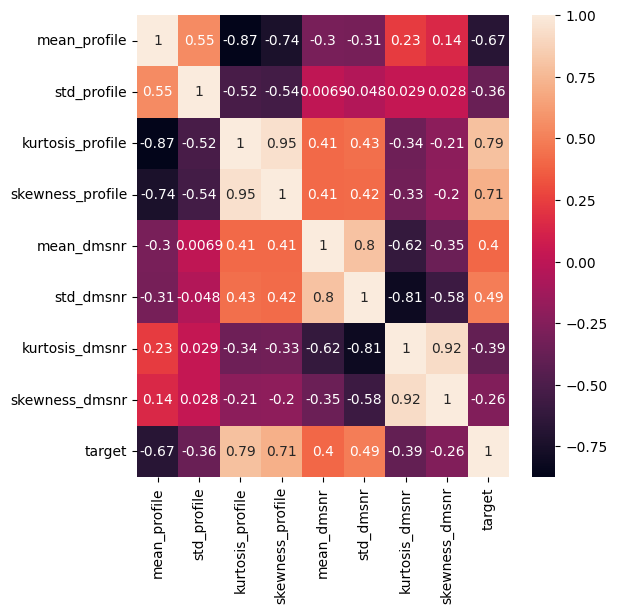

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True)

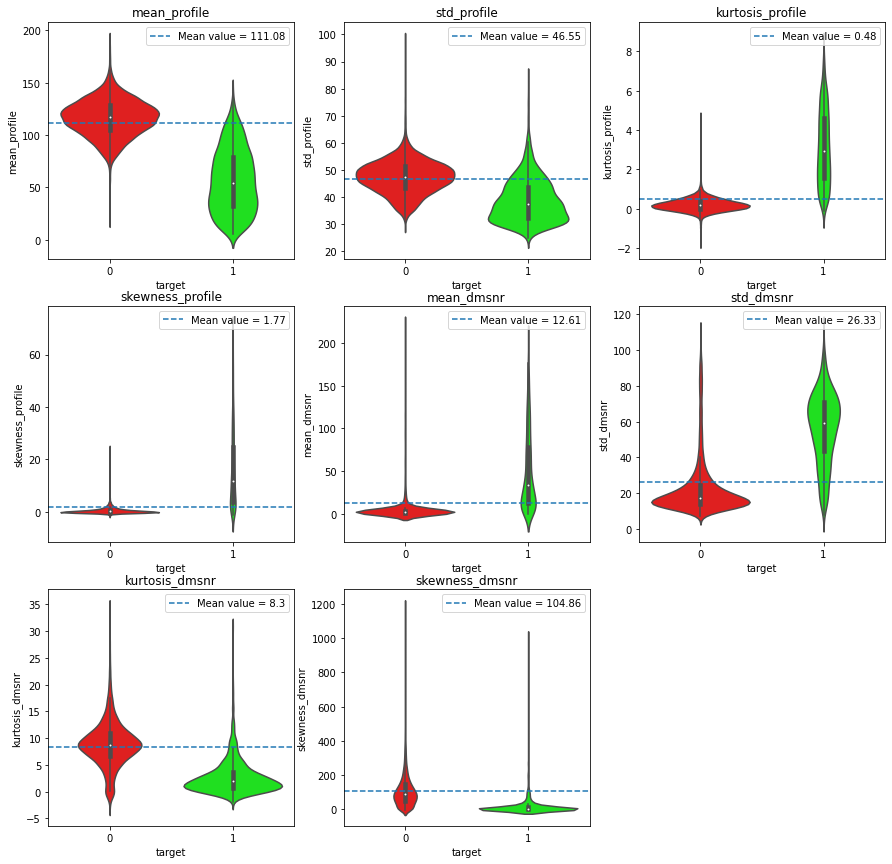

In [ ]:
features = df.iloc[:,0:8]
plt.figure(figsize=(15,20))
j = 0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=df["target"],y=df[i],palette=["red","lime"])
    plt.title(i)
    plt.axhline(df[i].mean(),linestyle = "dashed", label ="Mean value = " + str(round(df[i].mean(), 2)))
    plt.legend(loc="best")
    j = j + 1

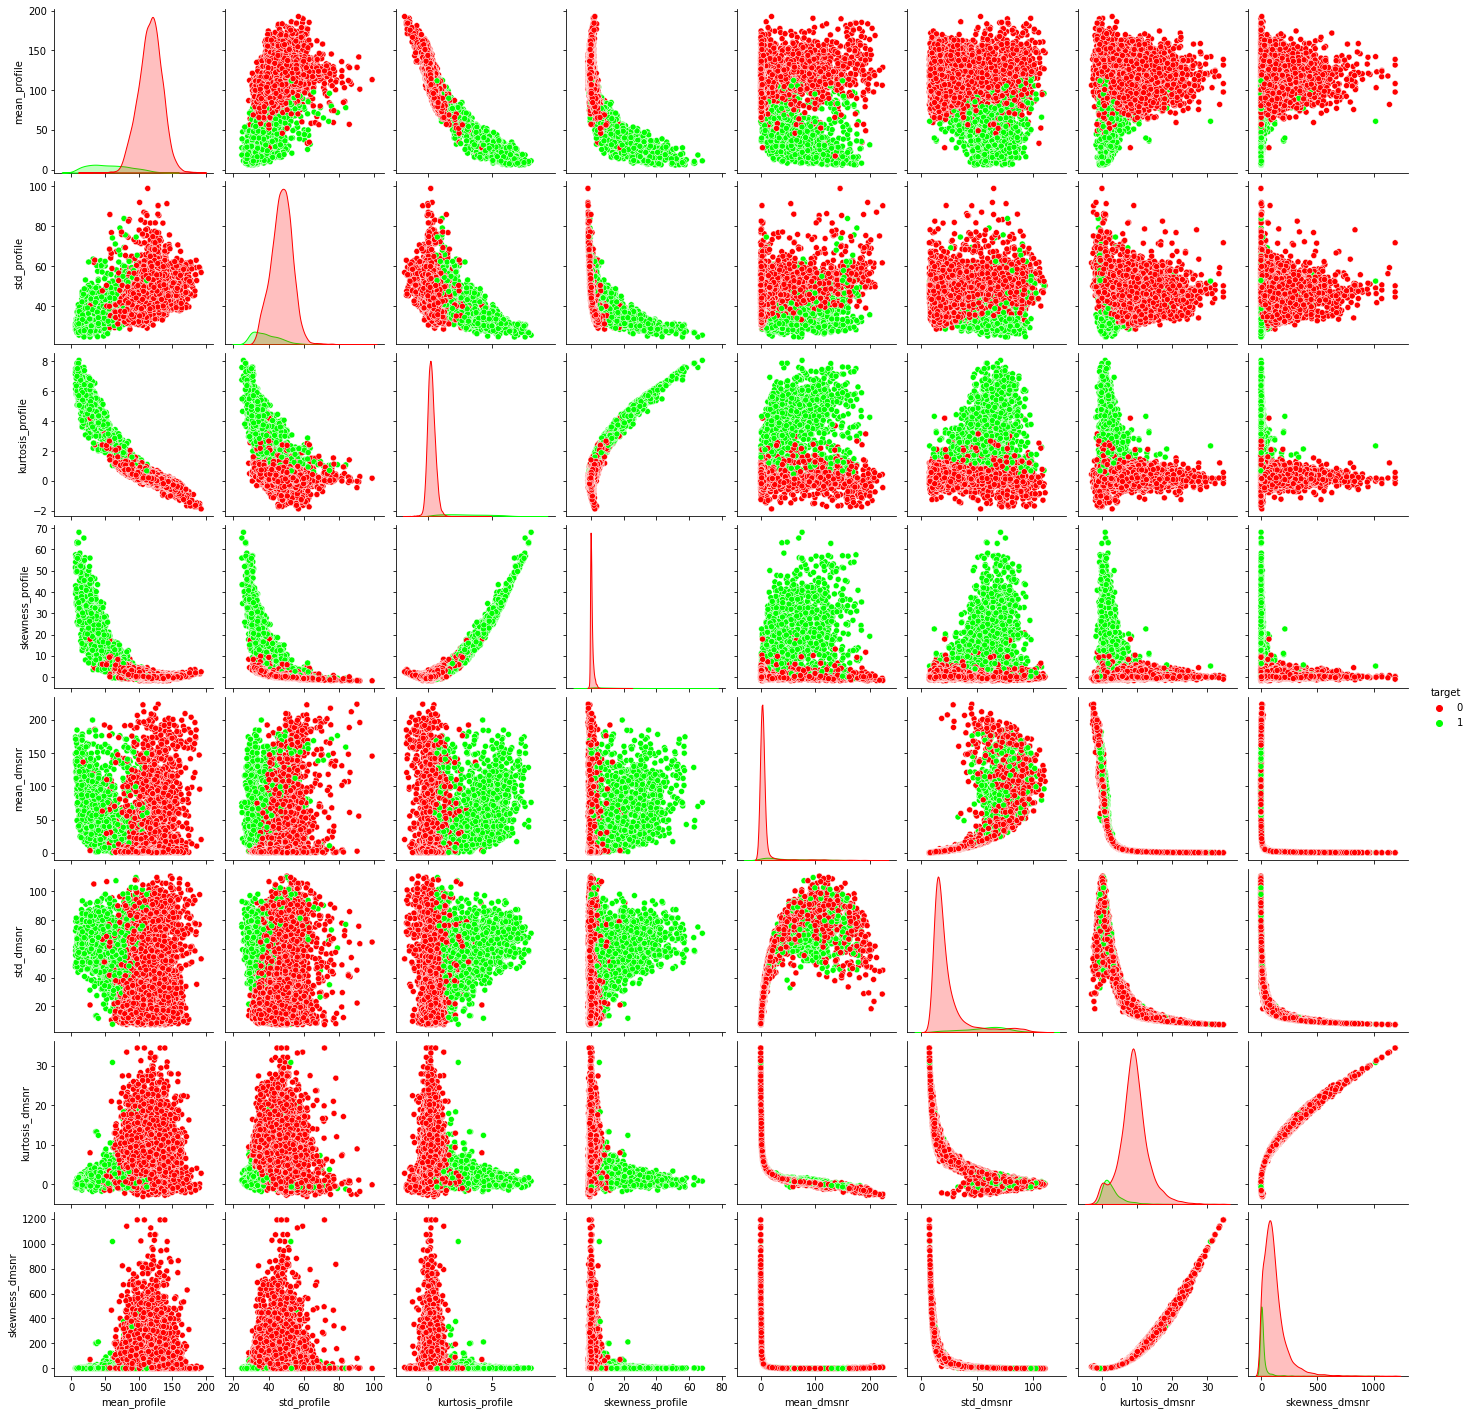

In [ ]:
sns.pairplot(df, hue="target", palette=["red","lime"])

In [ ]:
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
model = Sequential()

# Hidden layer - 1
model.add(Dense(16,activation='relu',input_dim=8))
model.add(Dropout(0.25))

# Hidden Layer - 2
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.25))

# Output layer : 
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weight = {0 : 1., 1 : 2.}

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, class_weight=weight, validation_data = (X_test,y_test), verbose=2)

Epoch 1/100
196/196 - 2s - loss: 0.4975 - accuracy: 0.8346 - val_loss: 0.1437 - val_accuracy: 0.9771 - 2s/epoch - 10ms/step
Epoch 2/100
196/196 - 1s - loss: 0.2120 - accuracy: 0.9594 - val_loss: 0.0858 - val_accuracy: 0.9764 - 543ms/epoch - 3ms/step
Epoch 3/100
196/196 - 1s - loss: 0.1718 - accuracy: 0.9667 - val_loss: 0.0788 - val_accuracy: 0.9784 - 507ms/epoch - 3ms/step
Epoch 4/100
196/196 - 1s - loss: 0.1630 - accuracy: 0.9700 - val_loss: 0.0779 - val_accuracy: 0.9773 - 512ms/epoch - 3ms/step
Epoch 5/100
196/196 - 1s - loss: 0.1560 - accuracy: 0.9713 - val_loss: 0.0735 - val_accuracy: 0.9788 - 584ms/epoch - 3ms/step
Epoch 6/100
196/196 - 1s - loss: 0.1504 - accuracy: 0.9708 - val_loss: 0.0732 - val_accuracy: 0.9793 - 513ms/epoch - 3ms/step
Epoch 7/100
196/196 - 0s - loss: 0.1497 - accuracy: 0.9725 - val_loss: 0.0720 - val_accuracy: 0.9795 - 470ms/epoch - 2ms/step
Epoch 8/100
196/196 - 0s - loss: 0.1449 - accuracy: 0.9726 - val_loss: 0.0706 - val_accuracy: 0.9791 - 486ms/epoch - 2ms

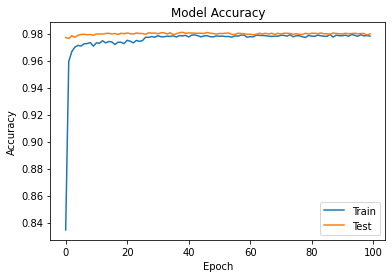

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

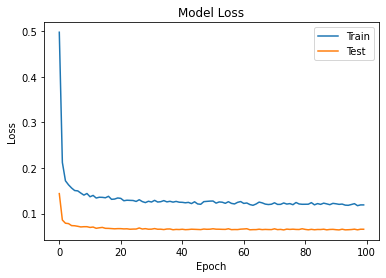

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

168/168 [==============================] - 0s 1ms/step


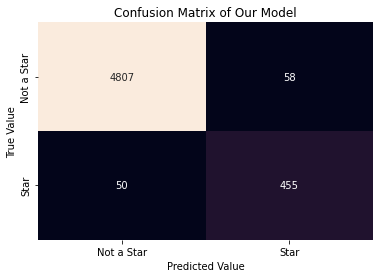

In [ ]:
label_aux = plt.subplot()
prediction = model.predict(X_test)
cm = confusion_matrix(y_test, np.round(prediction))
cm_nn = pd.DataFrame(cm, index = ['Not a Star','Star'], columns = ['Not a Star','Star'])
sns.heatmap(cm_nn,annot=True,fmt="d", cbar=False)
label_aux.set_title("Confusion Matrix of Our Model")
label_aux.set_xlabel('Predicted Value');label_aux.set_ylabel('True Value');

In [ ]:
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,np.round(prediction)),recall_score(y_test, np.round(prediction)), 
              f1_score(y_test, np.round(prediction))])
print(ptbl)

+--------------------+-------------------+--------------------+
|      Accuracy      |       Recall      |      F1Score       |
+--------------------+-------------------+--------------------+
| 0.9798882681564246 | 0.900990099009901 | 0.8939096267190569 |
+--------------------+-------------------+--------------------+
